In [1]:
import torch
import torchvision
import torch.nn.functional as F 
from torch import nn, optim
from torchvision import transforms, datasets
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm 
import numpy as np

In [2]:
EPOCH = 30
BATCH_SIZE = 64
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
print("Using Device:", DEVICE)

Using Device: cuda


In [3]:
# Load Fashion MNIST datasets
trainset = datasets.CIFAR10(
    root      = './data/',
    train     = True,
    download  = True,
    transform = transforms.Compose([
        transforms.RandomCrop(32, padding=4),
        #transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        #transforms.Normalize((0.5, 0.5, 0.5), 
        #                     (0.5, 0.5, 0.5))
    ])
)
train_loader = torch.utils.data.DataLoader(
    dataset     = trainset,
    batch_size  = BATCH_SIZE,
    shuffle     = True
)

Files already downloaded and verified


In [4]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3)
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

class ConvAutoencoder(nn.Module):
    def __init__(self, channel=3):
        super(ConvAutoencoder, self).__init__()
        # input size: batch x 3 x 32 x 32
        # output size: batch x 3 x 32 x 32

        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=4, stride=2, padding=1),   # batch x 16 x 16 x 16
            nn.ReLU(),
            nn.Conv2d(16, 4, kernel_size=4, stride=2, padding=1),             # batch x 4 x 8 x 8    
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(4, 16, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid()
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [5]:
autoencoder = ConvAutoencoder(channel=1).to(DEVICE)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.005)
criterion = nn.BCELoss()

def train(autoencoder, train_loader):
    autoencoder.train()
    for step, (x, label) in enumerate(train_loader):
        #x = x.view(-1, 28*28).to(DEVICE)
        #y = x.view(-1, 28*28).to(DEVICE)
        x = x.to(DEVICE)
        y = x.to(DEVICE)
        label = label.to(DEVICE)

        encoded, decoded = autoencoder(x)

        loss = criterion(decoded, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

def imgshow(img):
    npimg = img.cpu().numpy()
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

[EPOCH 1]


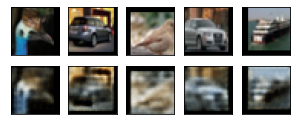

[EPOCH 2]


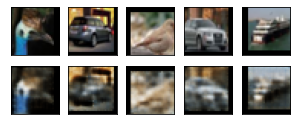

[EPOCH 3]


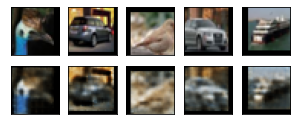

[EPOCH 4]


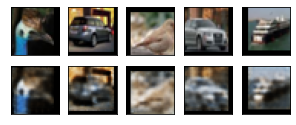

[EPOCH 5]


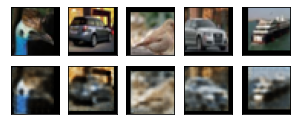

[EPOCH 6]


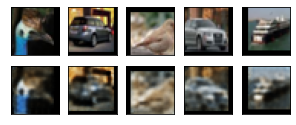

[EPOCH 7]


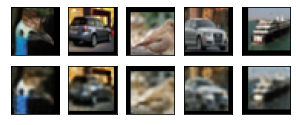

[EPOCH 8]


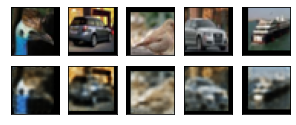

[EPOCH 9]


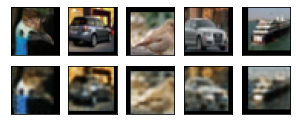

[EPOCH 10]


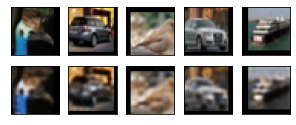

[EPOCH 11]


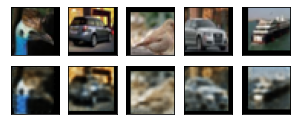

[EPOCH 12]


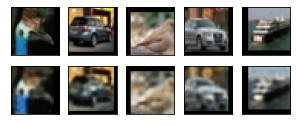

[EPOCH 13]


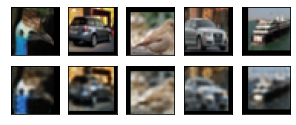

[EPOCH 14]


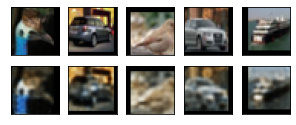

[EPOCH 15]


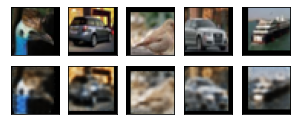

[EPOCH 16]


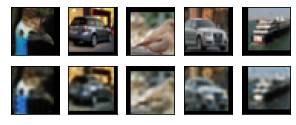

[EPOCH 17]


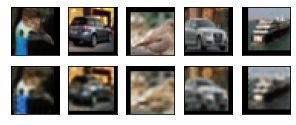

[EPOCH 18]


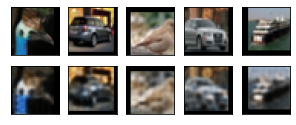

[EPOCH 19]


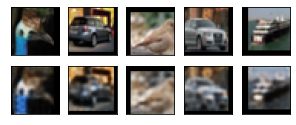

[EPOCH 20]


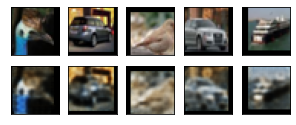

[EPOCH 21]


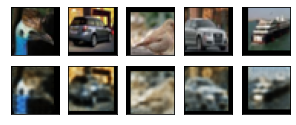

[EPOCH 22]


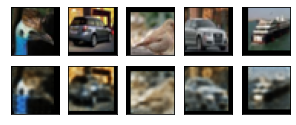

[EPOCH 23]


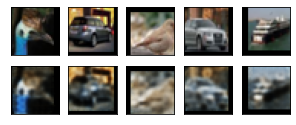

[EPOCH 24]


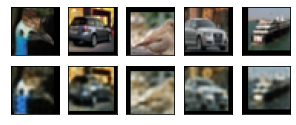

[EPOCH 25]


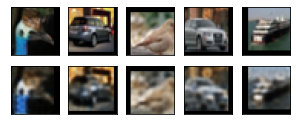

[EPOCH 26]


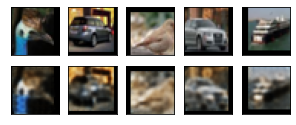

[EPOCH 27]


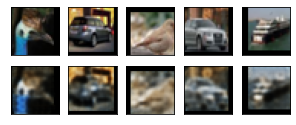

[EPOCH 28]


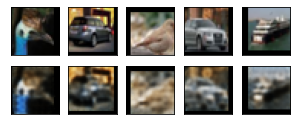

[EPOCH 29]


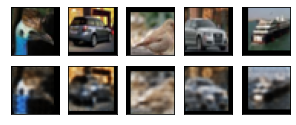

[EPOCH 30]


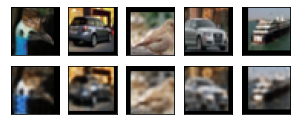

In [6]:
dataiter = iter(train_loader)
test_imgs = next(dataiter)

for epoch in range(1, EPOCH+1):
    train(autoencoder, train_loader)

    f, a = plt.subplots(2, 5, figsize=(5, 2))
    print("[EPOCH {}]".format(epoch))

    pre_imgs = test_imgs[0].to(DEVICE)
    _, decoded_imgs = autoencoder(pre_imgs)

    for i in range(5):
        pre_img = pre_imgs.to("cpu").numpy()[i]
        post_img = decoded_imgs.detach().to("cpu").numpy()[i]
        a[0][i].imshow(np.transpose(pre_img, (1, 2, 0)))
        a[0][i].set_xticks(())
        a[0][i].set_yticks(())
        a[1][i].imshow(np.transpose(post_img, (1, 2, 0)))
        a[1][i].set_xticks(())
        a[1][i].set_yticks(())
    plt.show()

/root/anaconda3/envs/torch/lib/python3.8/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


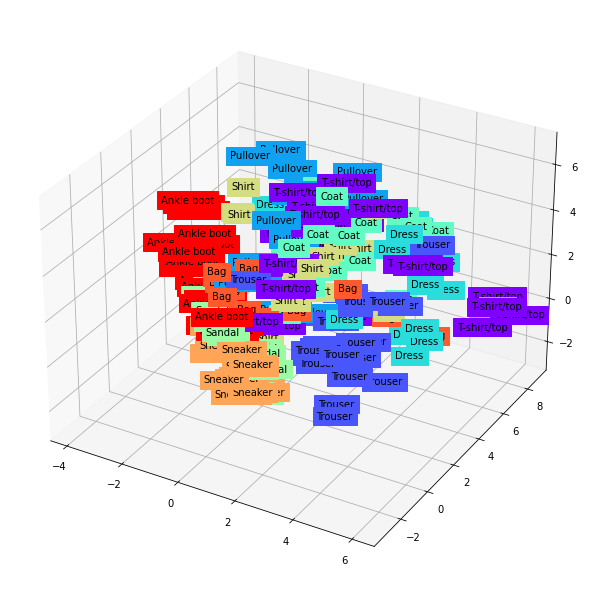

In [10]:
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig)
X = encoded_data.data[:, 0].numpy()
Y = encoded_data.data[:, 1].numpy()
Z = encoded_data.data[:, 2].numpy()
labels = trainset.train_labels[:200].numpy()

for x, y, z, s in zip(X, Y, Z, labels):
    name = CLASSES[s]
    color = cm.rainbow(int(255*s/9))
    ax.text(x, y, z, name, backgroundcolor=color)
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_zlim(Z.min(), Z.max())
plt.show()